In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [20]:
#Identify numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

In [21]:
numerical_columns

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [22]:
#Calculate descriptive statistics
statistics = df[numerical_columns].describe()
statistics

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [23]:
mode = df[numerical_columns].mode().iloc[0]
mode

,0
Volume,3.000000
Avg Price,400.000000
Total Sales Value,24300.000000
Discount Rate (%),5.007822
Discount Amount,69.177942
Net Sales Value,326.974801


In [24]:
print("Descriptive Statistics for Numerical Columns:")
print(statistics)
print("\nMode:")
print(mode)

Descriptive Statistics for Numerical Columns:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75

Data Visualization

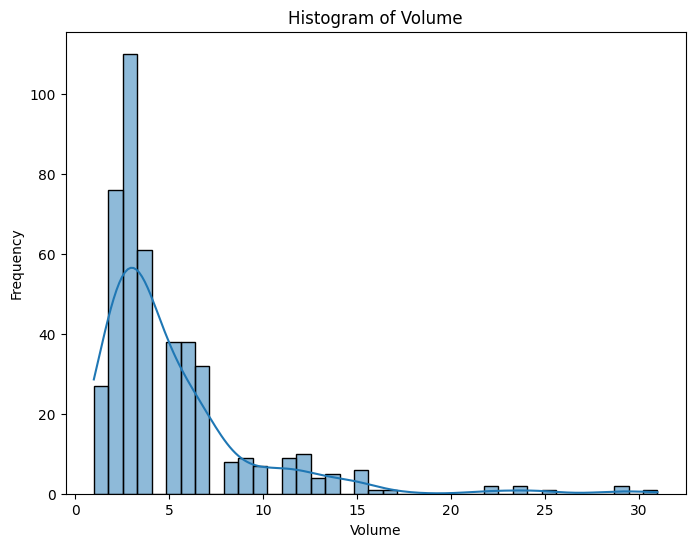

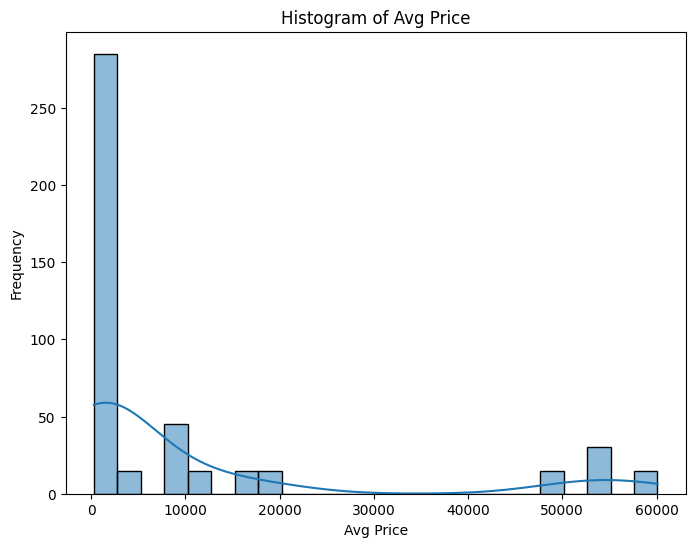

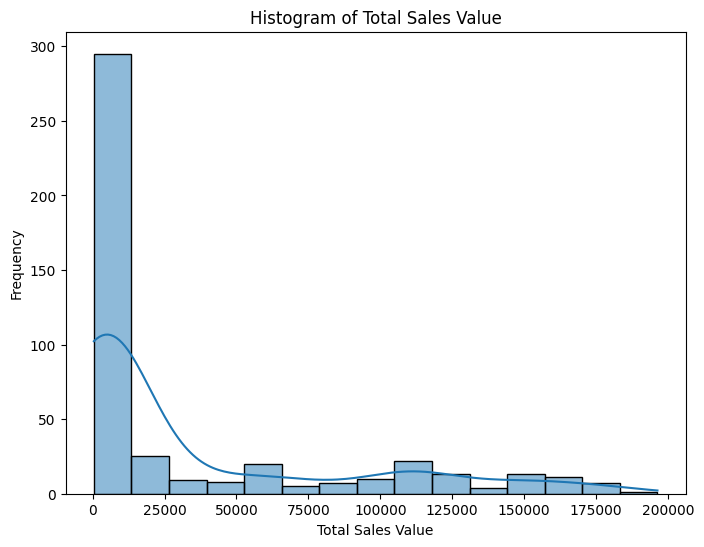

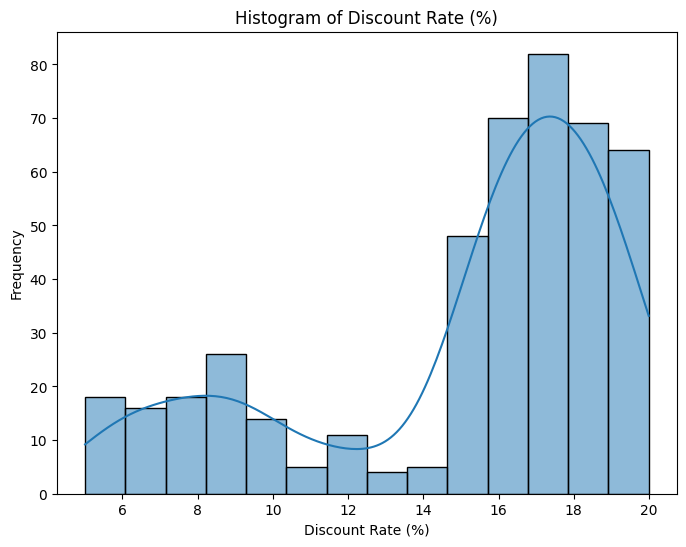

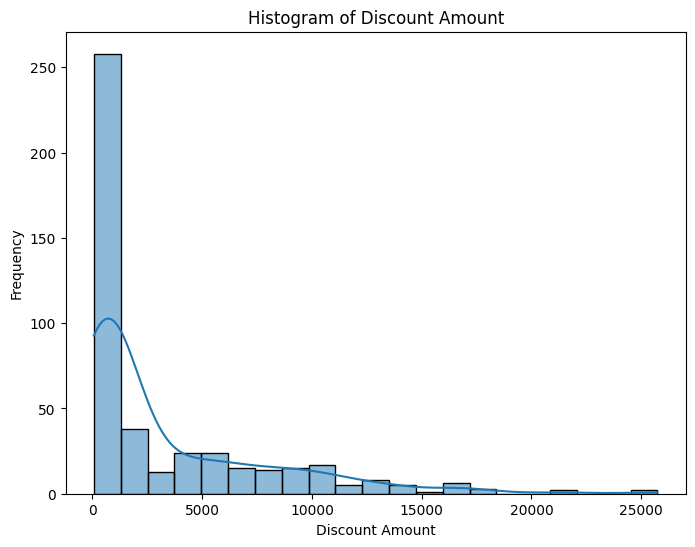

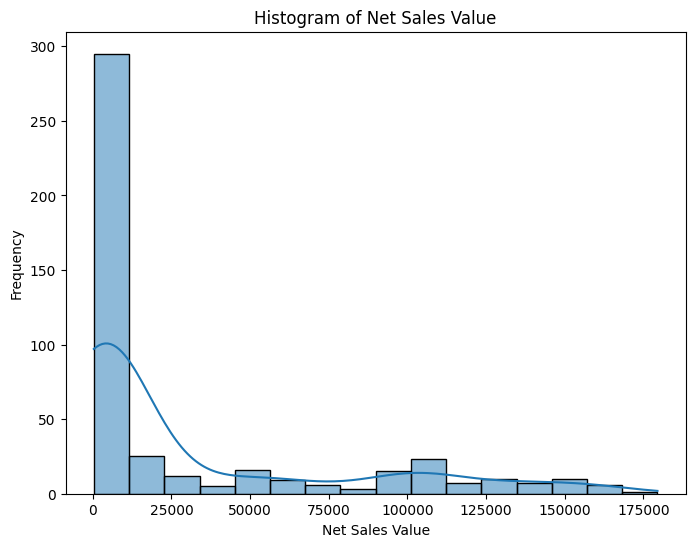

In [26]:
#Histograms for numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

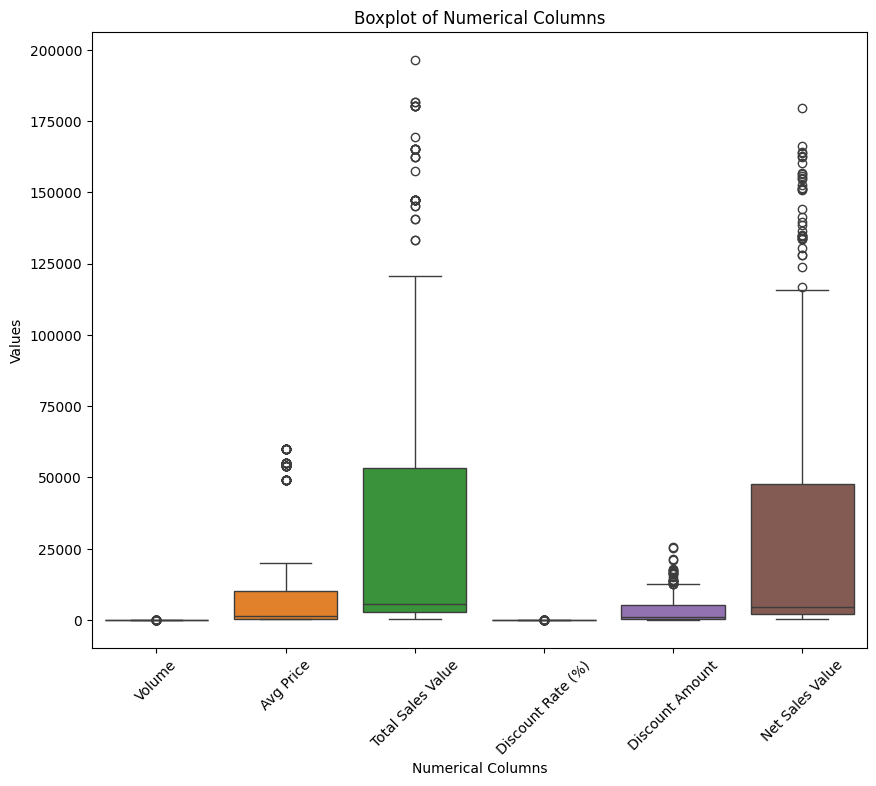

In [27]:
#Boxplots for numerical columns
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

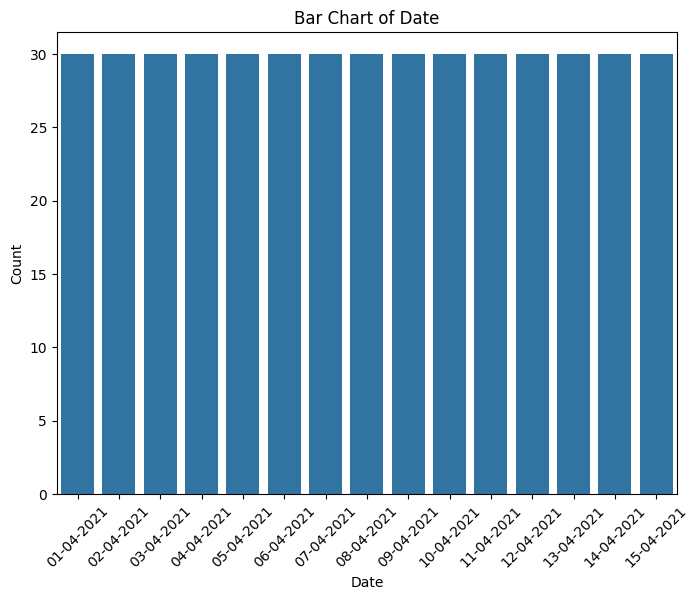

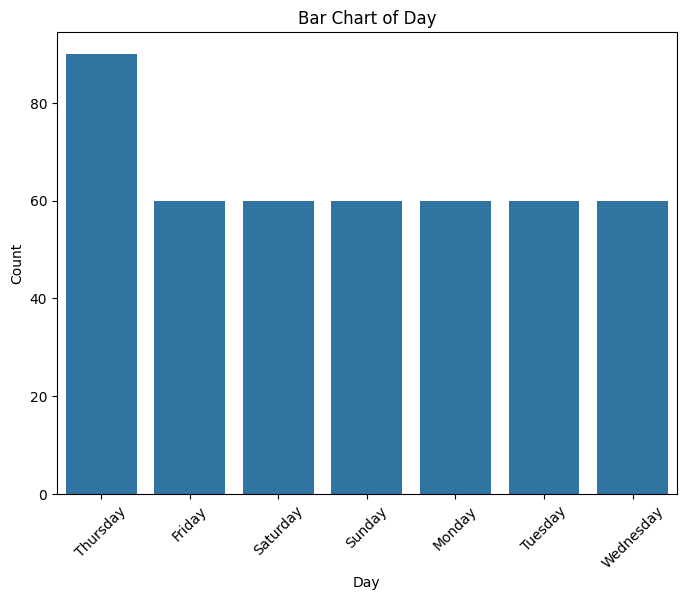

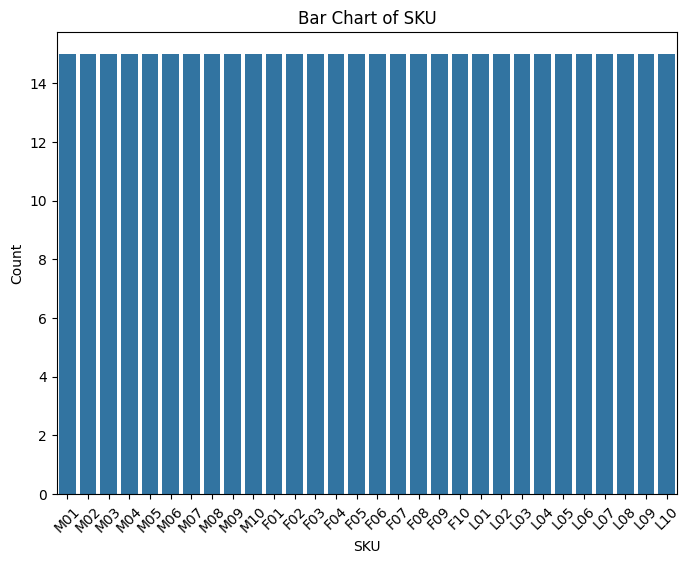

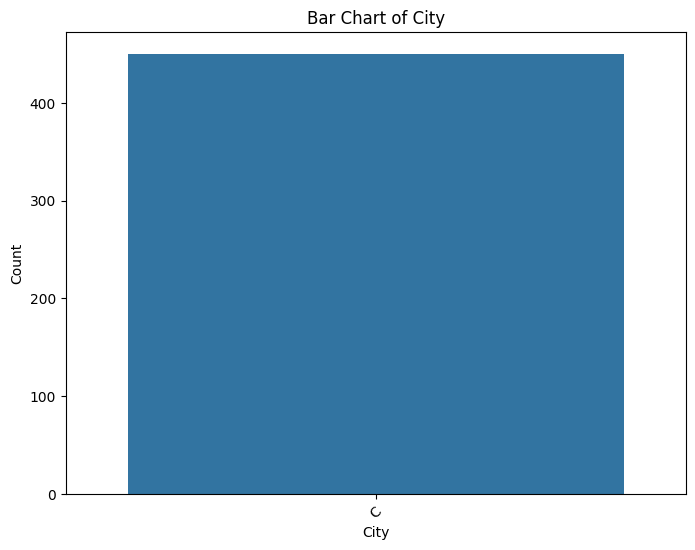

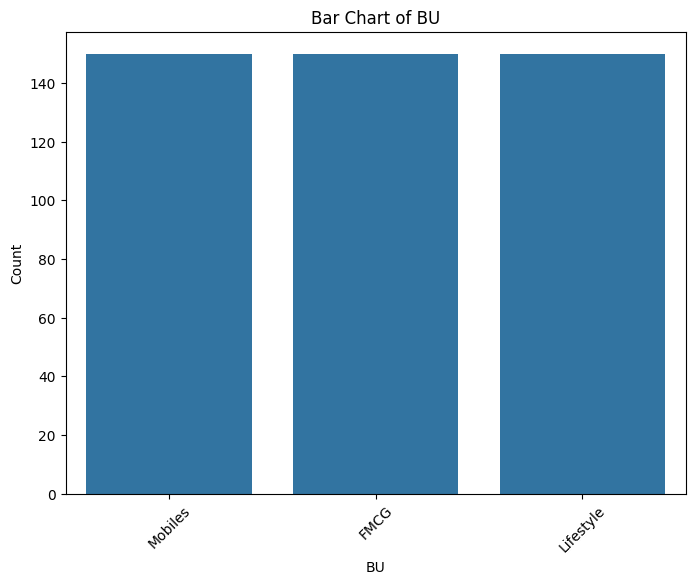

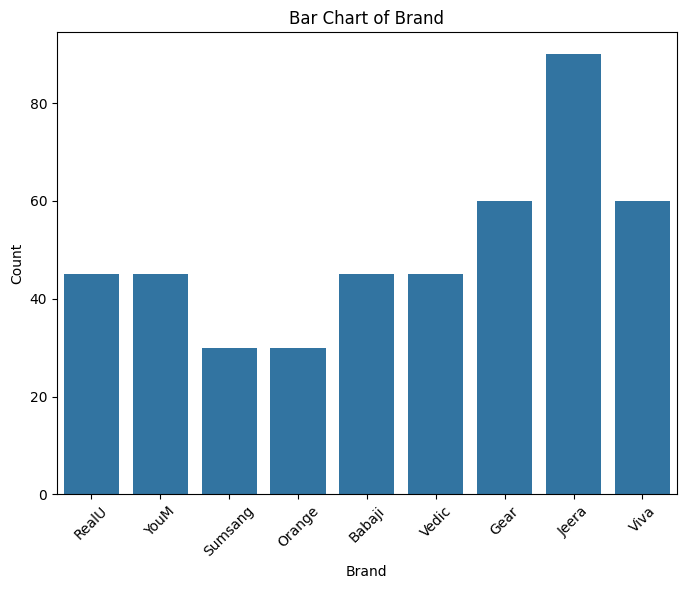

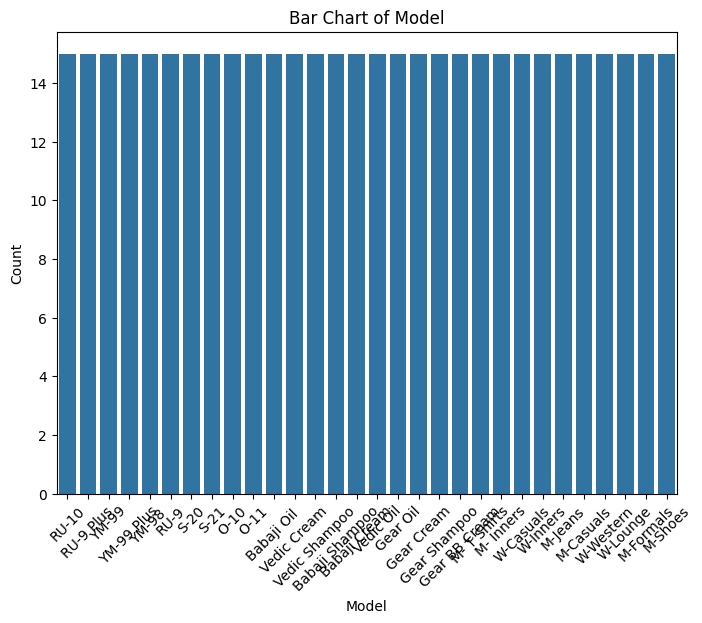

In [28]:
#Bar chart analysis for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Standardization of Numerical Variables

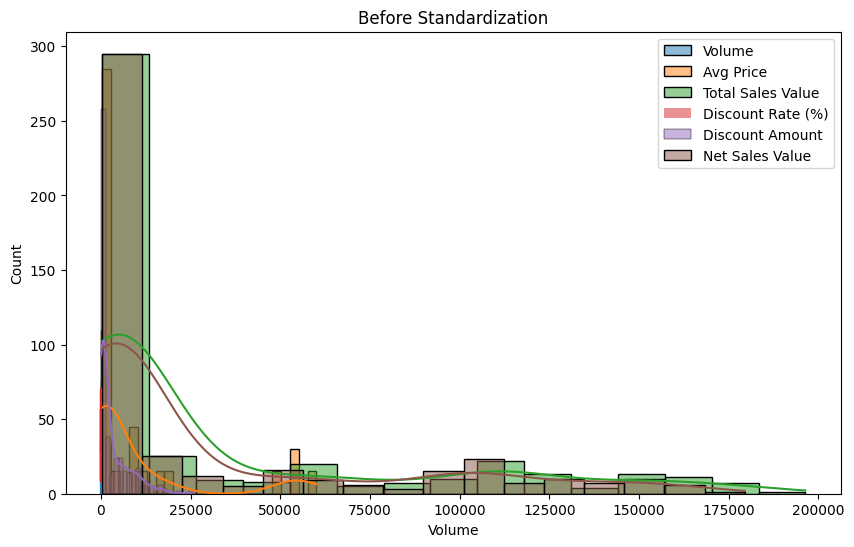

In [29]:
#Before Standardization _Plot histograms
plt.figure(figsize=(10, 6))
plt.title('Before Standardization')
for column in numerical_columns:
    sns.histplot(df[column], kde=True, label=column)
plt.legend()
plt.show()

In [32]:
#Standardization
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

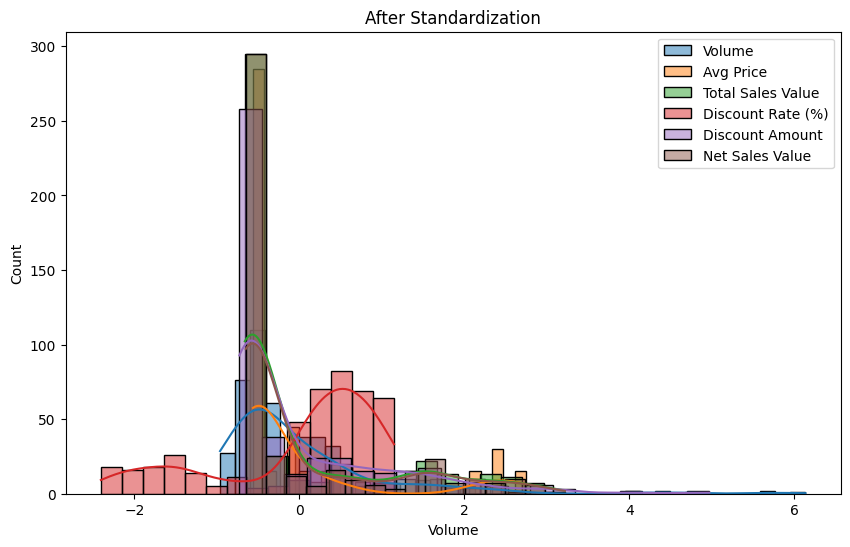

In [33]:
##After Standardization - Plot histograms
plt.figure(figsize=(10, 6))
plt.title('After Standardization')
for column in numerical_columns:
    sns.histplot(df[column], kde=True, label=column)
plt.legend()
plt.show()

Conversion of Categorical Data into Dummy Variables

In [34]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [36]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
print("Transformed Dataset:")
print(df_encoded.head())

Transformed Dataset:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.804756            False            False            False   
1         1.271026            False            False            False   
2         1.545675            False            False            False   
3         1.765810            False            False            False   
4        -0.227595            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Ved

# **conclusion**


the main insights derived from the descriptive analytics and data visualizations are as follows:

Descriptive Analytics: We calculated fundamental statistical metrics such as the mean, median, mode, and standard deviation for the dataset's numerical attributes. Using visual tools like histograms, boxplots, and bar graphs, we explored the distribution patterns and relationships between numerical and categorical variables.

Data Visualizations: Histograms illustrated the distribution of numerical variables, highlighting skewness and the presence of outliers. Boxplots provided a detailed view of outliers and the spread of data within the interquartile range. Bar graphs depicted the frequency or count of categories within categorical variables, offering a clear understanding of category distributions.

Reflection on Data Preprocessing Steps:

Standardization: Numerical variables were standardized through z-score normalization, aligning them to have a mean of 0 and a standard deviation of 1. This step is vital for maintaining consistency across variables, especially for algorithms like k-means clustering or support vector machines, which require comparable data scales.